In [218]:
# Import a python file from a folder in the upper directory
import sys
sys.path.append('../')
import mystoi

# Do i have to reset the path after importing the file?
sys.path.remove('../')

In [219]:
# Audio files to import
spin_file_path = r"C:\Users\George\Desktop\Automatic Control and Robotics\Semester 7\Thesis\Datasets and other Downloads\clarity_CPC1_data.test.v1\clarity_CPC1_data\clarity_data\HA_outputs\test\S08520_L0216_E001.wav"
target_file_path = r"C:\Users\George\Desktop\Automatic Control and Robotics\Semester 7\Thesis\Datasets and other Downloads\clarity_CPC1_data.test.v1\clarity_CPC1_data\clarity_data\scenes\S08520_target_anechoic.wav"


In [220]:
import soundfile as sf
# Opening audio files using soundfile
spin, spin_sr = sf.read(spin_file_path)
target, target_sr = sf.read(target_file_path)

new_sr = 10000

In [221]:
# Check lengths of both audios
old_len_spin = len(spin)
old_len_target = len(target)
print(f'Old lengths: {old_len_spin}, {old_len_target}')

# Remove first 2 seconds and last 1 second of both audios
spin = spin[2*spin_sr:-spin_sr]
target = target[2*target_sr:-target_sr]

# Check lengths of both audios
new_len_spin = len(spin)
new_len_target = len(target)
print(f'New lengths: {new_len_spin}, {new_len_target}')

# Find out how many seconds were removed from each audio using the length of the audio and the sampling rate
removed_seconds_spin = (old_len_spin - new_len_spin) / spin_sr
removed_seconds_target = (old_len_target - new_len_target) / target_sr
print(f'Removed seconds: {removed_seconds_spin}, {removed_seconds_target}')

Old lengths: 168641, 232407
New lengths: 72641, 100107
Removed seconds: 3.0, 3.0


In [222]:
from scipy.signal import resample

spin_resampled = resample(spin, int(len(spin) * new_sr / spin_sr))   # NOTE - current_no_of_samples / current_sampling_rate is the duration of audio signal
target_resampled = resample(target, int(len(target) * new_sr / target_sr))

In [223]:
# Convert to mono
if len(spin.shape) == 2:
    spin_mono = spin.mean(axis=1)
    spin_resampled_mono = spin_resampled.mean(axis=1)
else:
    raise Exception("SPIN audio is not stereo.")
if len(target.shape) == 2:
    target_mono = target.mean(axis=1)
    target_resampled_mono = target_resampled.mean(axis=1)
else:
    raise Exception("Target audio is not stereo.")

In [224]:
dmatrix_3d, clean_tf_bins, spin_tf_bins = mystoi.compute_stoi(target_resampled_mono, spin_resampled_mono, new_sr, return_3=True, keep_silent_frames=True)

print("Shape of dmatrix 3d: ", dmatrix_3d.shape)
print("Shape of clean_tf_bins: ", clean_tf_bins.shape)
print("Shape of spin_tf_bins: ", spin_tf_bins.shape)

Shape of dmatrix 3d:  (150, 15, 30)
Shape of clean_tf_bins:  (15, 179)
Shape of spin_tf_bins:  (15, 179)


---

Before removing first 2 seconds and last 1 second:
```
Shape of dmatrix:  (384, 15, 30)
Shape of clean_tf_bins:  (15, 413)
Shape of spin_tf_bins:  (15, 413)
```

After removing first 2 seconds and last 1 second:
```
Shape of dmatrix:  (150, 15, 30)
Shape of clean_tf_bins:  (15, 179)
Shape of spin_tf_bins:  (15, 179)
```

---

In [225]:
# Reduce the 3d matrix to 2d matrix by averaging over the time axis
dmatrix_2d = dmatrix_3d.sum(axis=2) /dmatrix_3d.shape[1]
print("Shape of dmatrix 2d: ", dmatrix_2d.shape)

Shape of dmatrix 2d:  (150, 15)


In [226]:
# Checking how to make shapes same
frame_length = 30
half_frame_length = frame_length // 2

# Transpose dmatrix_2d to have time axis as the first axis
dmatrix_2d = dmatrix_2d.T

print("frame_length: ", frame_length)
print("half_frame_length: ", half_frame_length)
print("Shape of dmatrix 2d: ", dmatrix_2d.shape)
print("Shape of clean_tf_bins: ", clean_tf_bins[:, half_frame_length:-half_frame_length+1].shape)
print("Shape of spin_tf_bins: ", clean_tf_bins[:, half_frame_length:-half_frame_length+1].shape)

frame_length:  30
half_frame_length:  15
Shape of dmatrix 2d:  (15, 150)
Shape of clean_tf_bins:  (15, 150)
Shape of spin_tf_bins:  (15, 150)


In [227]:
# Remove half frame length from the tf_bins from both ends of 2nd axis
clean_tf_bins = clean_tf_bins[:, half_frame_length:-half_frame_length+1]
spin_tf_bins = spin_tf_bins[:, half_frame_length:-half_frame_length+1]

print("Shape of dmatrix 2d: ", dmatrix_2d.shape)
print("Shape of clean_tf_bins: ", clean_tf_bins.shape)
print("Shape of spin_tf_bins: ", spin_tf_bins.shape)

Shape of dmatrix 2d:  (15, 150)
Shape of clean_tf_bins:  (15, 150)
Shape of spin_tf_bins:  (15, 150)


In [228]:
# Visualize the tf bins
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

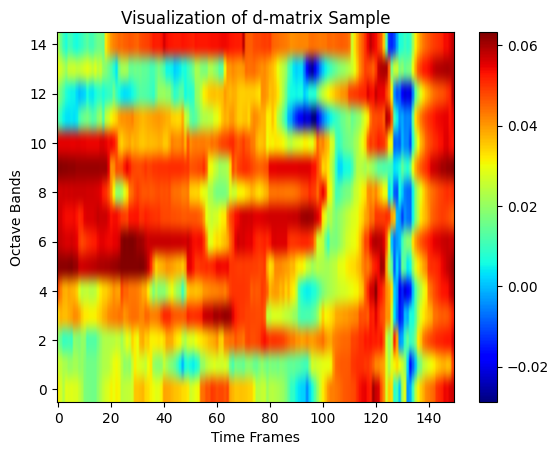

In [235]:
plt.imshow(dmatrix_2d, aspect='auto', origin='lower', cmap='jet')
plt.colorbar()
plt.title("Visualization of d-matrix Sample")
plt.xlabel("Time Frames")
plt.ylabel("Octave Bands")
plt.show()

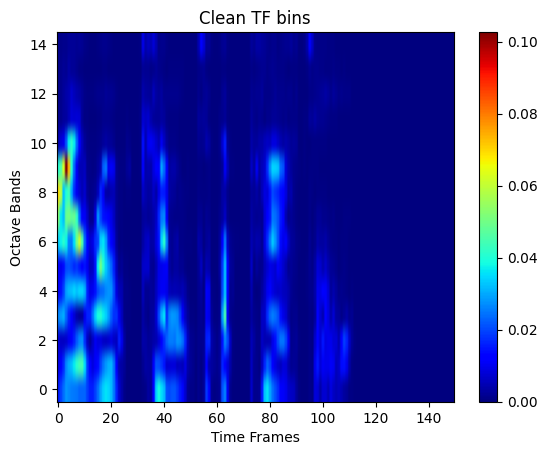

In [230]:
plt.imshow(clean_tf_bins, aspect='auto', origin='lower', cmap='jet')
plt.colorbar()
plt.title("Clean TF bins")
plt.xlabel("Time Frames")
plt.ylabel("Octave Bands")
plt.show()

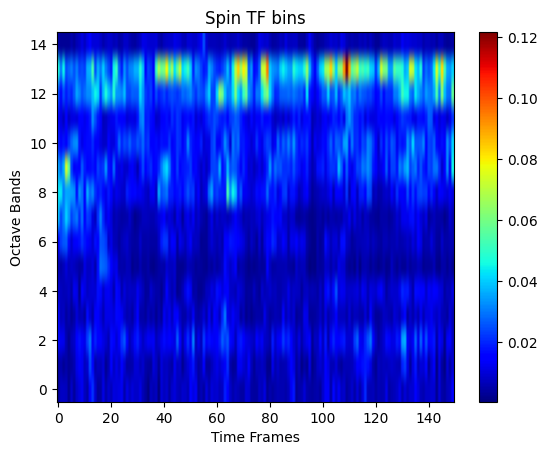

In [231]:
plt.imshow(spin_tf_bins, aspect='auto', origin='lower', cmap='jet')
plt.colorbar()
plt.xlabel("Time Frames")
plt.ylabel("Octave Bands")
plt.title("Spin TF bins")
plt.show()